# Task 1

## Prediction of Students' Scores Using Supervised ML (Linear Regression)
In this task we will predict the percentage of scores a student is expected to get in an exam based on the number of hours they studied.

### Importing the needed Libraries
First, Let's import all the libraries that we will need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

### Loading and investigating the Dataset

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.shape

(25, 2)

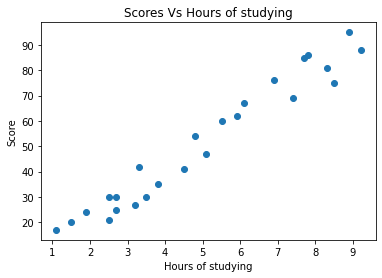

In [6]:
plt.scatter(data.Hours, data.Scores)
plt.title("Scores Vs Hours of studying")
plt.xlabel("Hours of studying")
plt.ylabel("Score")
plt.show();

obviously there is a direct positive correlation between the hours and the scores variables.

### Prepare the data for the linear regression model

In [7]:
X = data.iloc[:, :-1].values #must be 2d array
y = data.Scores.values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
X_train.shape

(18, 1)

### Training our Model and Predicting on test set

In [10]:
reg = LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
pred

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

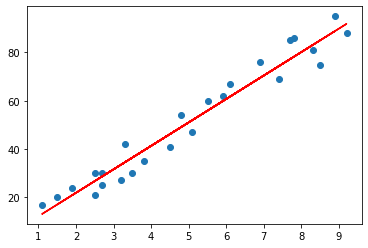

In [17]:
# Plotting the regression line
line = reg.coef_ * X + reg.intercept_
plt.scatter(X, y)
plt.plot(X, line, c="r");
plt.show();

### Evaluate our Regression Model 

Since our model is a regression model, it can be evaluated using:
- the coefficient of determination $R^{2}$, it is the  square of the Correlation Coefficient(R), it is between 0 to 1 and a bigger value indicates a better fit between prediction and actual value.

In [12]:
r2 = reg.score(X_test, y_test) #gives nearly 95%
print("R**2 =", r2)

R**2 = 0.9553509219739938


- the Mean Square Error(MSE)/Root Mean Square Error(RMSE), Mean Square Error is an absolute measure of the goodness for the fit, Root Mean Square Error(RMSE) is the square root of MSE.

In [13]:
mse = mean_squared_error(y_test, pred)
print("MSE =", mse)
rmse = math.sqrt(mse)
print("RMSE =", rmse)

MSE = 23.516396034595225
RMSE = 4.8493706843873285


- Mean Absolute Error(MAE), MAE is taking the sum of the absolute value of error.

In [14]:
mae = mean_absolute_error(y_test, pred)
print("MAE =", mae)

MAE = 4.425394675156183
